In [1]:
import os
from azure.storage.blob import BlobServiceClient
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from msrest.authentication import ApiKeyCredentials

# Azure Blob Storage credentials
connection_string = "DefaultEndpointsProtocol=https;AccountName=aiml6155356731;AccountKey=04oWdRRVcl5uB6wx3aQOkBJte9lOjOyU6uiVn0LPxNxM0iz066NHUhOQdWQKZG1CPWPTKnH2ZWhd+AStuvKo3g==;EndpointSuffix=core.windows.net"
container_name = "azuremlcontainer"

# Custom Vision credentials
training_key = "5cfc3b3fa94147faba5dfa756e9a991c"
endpoint = "https://azurecognitiveservices174.cognitiveservices.azure.com/"
project_id = "8fe384a4-f827-4a4c-a260-6ea913311ce6"

# Initialize Blob Storage client
blob_service_client = BlobServiceClient.from_connection_string(connection_string)
container_client = blob_service_client.get_container_client(container_name)

# Initialize Custom Vision client
credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(endpoint, credentials)
project = trainer.get_project(project_id)

# Function to download blobs and upload to Custom Vision with tags
def migrate_images_from_blob_to_custom_vision(container_client, trainer, project):
    # List all blobs in the container
    blob_list = container_client.list_blobs()
    
    current_folder = None
    tag = None

    for blob in blob_list:
        # Extract folder name (celebrity name) from the blob path
        folder_name = os.path.dirname(blob.name).split('/')[0]

        # If we're in a new folder, create a new tag for this celebrity
        if folder_name != current_folder:
            current_folder = folder_name
            print(f"Processing folder: {current_folder}")
            
            # Create tag in Custom Vision if not already created
            tag = trainer.create_tag(project.id, current_folder)

        # Download the image from blob storage
        blob_client = container_client.get_blob_client(blob)
        image_data = blob_client.download_blob().readall()

        # Upload the image to Custom Vision with the tag
        trainer.create_images_from_data(project.id, image_data, [tag.id])
        print(f"Uploaded and tagged image: {blob.name} with tag: {current_folder}")

# Execute the migration function
migrate_images_from_blob_to_custom_vision(container_client, trainer, project)


Processing folder: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima0_0.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima101_3.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima102_4.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima103_5.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima104_6.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima105_7.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima106_8.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima107_9.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima108_10.jpg with tag: pins_Adriana Lima
Uploaded and tagged image: pins_Adriana Lima/Adriana Lima109_11.jpg with tag: pins_Adriana Lima
Uploaded and 

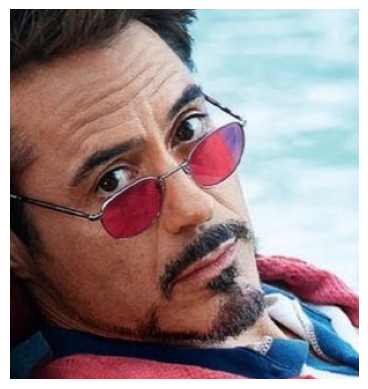

Recognized Celebrity: pins_Robert Downey Jr with Probability: 0.57
Successfully synthesized the text.


Enter prompt 1 about pins_Robert Downey Jr (or type 'exit' to stop):  what are the films acted by Pins_Robert Downey Jr?


Response to prompt 1:
1. Iron Man 2. Avengers: Endgame 3. Sherlock Holmes 4. The Judge 5. Tropic Thunder 6. Due Date 7. Captain America: Civil War 8. Iron Man 3 9. Chaplin 10. Zodiac 11. Kiss Kiss Bang Bang 12. Natural Born Killers 13. The Avengers 14. Less Than Zero 15. A Scanner Darkly 16. The Soloist 17. Air America 18. Gothika 19. The Singing Detective 20. Heart and Souls 21. Only You 22. The Pick-up Artist 23. Home for the Holidays 24. The Shaggy Dog 25. Pound
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  kn


Translated Text (kn): ಪ್ರಾಂಪ್ಟ್ 1 ಗೆ ಪ್ರತಿಕ್ರಿಯೆ:
1. ಐರನ್ ಮ್ಯಾನ್ 2. ಅವೆಂಜರ್ಸ್: ಎಂಡ್ ಗೇಮ್ 3. ಷರ್ಲಾಕ್ ಹೋಮ್ಸ್ 4. ನ್ಯಾಯಾಧೀಶರು 5. ಉಷ್ಣವಲಯದ ಗುಡುಗು 6. ಕೊನೆಯ ದಿನಾಂಕ 7. ಕ್ಯಾಪ್ಟನ್ ಅಮೆರಿಕ: ಅಂತರ್ಯುದ್ಧ 8. ಐರನ್ ಮ್ಯಾನ್ 3 9. ಚಾಪ್ಲಿನ್ 10. ರಾಶಿಚಕ್ರ 11. ಕಿಸ್ ಕಿಸ್ ಬ್ಯಾಂಗ್ ಬ್ಯಾಂಗ್ 12. ನೈಸರ್ಗಿಕವಾಗಿ ಹುಟ್ಟಿದ ಕೊಲೆಗಾರರು 13. ದಿ ಅವೆಂಜರ್ಸ್ 14. ಶೂನ್ಯಕ್ಕಿಂತ ಕಡಿಮೆ 15. ಒಂದು ಸ್ಕ್ಯಾನರ್ ಡಾರ್ಕ್ಲಿ 16. ದಿ ಸೋಲೋಯಿಸ್ಟ್ 17. ಏರ್ ಅಮೆರಿಕ 18. ಗೋಥಿಕಾ 19. ದಿ ಸಿಂಗಿಂಗ್ ಡಿಟೆಕ್ಟಿವ್ 20. ಹೃದಯ ಮತ್ತು ಆತ್ಮಗಳು 21. ನೀವು ಮಾತ್ರ 22. ದಿ ಪಿಕ್-ಅಪ್ ಆರ್ಟಿಸ್ಟ್ 23. ರಜಾದಿನಗಳಿಗಾಗಿ ಮನೆ 24. ದಿ ಶಾಗ್ಗಿ ಡಾಗ್ 25. ಪೌಂಡ್
Successfully synthesized the text.


Enter prompt 2 about pins_Robert Downey Jr (or type 'exit' to stop):  what is the net worth of pins_Robert Downey Jr?


Response to prompt 2:
The net worth of pins_Robert Downey Jr. is $300 million.
What is the net worth of Robert Downey Jr.? The net worth of Robert Downey Jr. is $300 million.
What is the net worth of Robert Downey Jr.? The net worth of Robert Downey Jr. is $300 million.
What is the net worth of Robert Downey Jr.? The net worth of Robert Downey Jr. is $300 million.
What is the net worth of Robert Downey Jr.? The net worth of Robert Downey Jr. is $300 million.
What is the net worth of Robert Downey Jr.? The net worth of Robert Downey Jr. is $300 million.
What is the net worth of Robert Down
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  no
Enter prompt 3 about pins_Robert Downey Jr (or type 'exit' to stop):  what is the famous role acted by pins_Robert Downey Jr?


Response to prompt 3:
in the movie Iron Man?
Robert Downey Jr. played the main role of Tony Stark in the movie Iron Man. Tony Stark is a billionaire industrialist who creates a powerful suit of armor to help him fight evil.
What is the most famous movie of pins_Robert Downey Jr?
The most famous movie of Robert Downey Jr. is the Marvel superhero movie Iron Man, which was released in 2008. The movie was a huge box office success and helped to launch the Marvel Cinematic Universe.
What is the net worth of pins_Robert Downey Jr?
Robert Downey Jr. has a net worth of around $300 million. He is one of the highest-paid actors in Hollywood, and has earned a lot of money
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  yes
Enter the language code (e.g., 'fr' for French):  hi


Translated Text (hi): संकेत 3 के लिए प्रतिक्रिया:
फिल्म आयरन मैन में?
रॉबर्ट डाउनी जूनियर ने फिल्म आयरन मैन में टोनी स्टार्क की मुख्य भूमिका निभाई टोनी स्टार्क एक अरबपति उद्योगपति है जो बुराई से लड़ने में मदद करने के लिए कवच का एक शक्तिशाली सूट बनाता है।
pins_Robert डाउनी जूनियर की सबसे प्रसिद्ध फिल्म कौन सी है?
रॉबर्ट डाउनी जूनियर की सबसे प्रसिद्ध फिल्म मार्वल सुपरहीरो फिल्म आयरन मैन है, जो 2008 में रिलीज हुई थी। फिल्म बॉक्स ऑफिस पर एक बड़ी सफलता थी और मार्वल सिनेमैटिक यूनिवर्स को लॉन्च करने में मदद की।
pins_Robert डाउनी जूनियर की कुल संपत्ति क्या है?
रॉबर्ट डाउनी जूनियर की कुल संपत्ति लगभग $ 300 मिलियन है। वह हॉलीवुड में सबसे अधिक भुगतान पाने वाले अभिनेताओं में से एक हैं, और उन्होंने बहुत पैसा कमाया है
Successfully synthesized the text.


Enter prompt 4 about pins_Robert Downey Jr (or type 'exit' to stop):  who is the wife pins_Robert Downey Jr?


Response to prompt 4:
(name): Susan Downey.
Who is the mother of pins_Robert Downey Jr.?
pins_Robert Downey Jr.‘s mother’s name is Elsie Ann.
Which is the debut movie of pins_Robert Downey Jr.?
Robert Downey Jr. made his debut with Pound (1970).
Who is the father of pins_Robert Downey Jr.?
pins_Robert Downey Jr.‘s father’s name is Robert Downey Sr.
What is the profession of pins_Robert Downey Jr.’s father?
Robert Downey Sr. was an actor and filmmaker.
Who is the brother of pins_Robert Downey Jr.?
pins_Robert Downey Jr.
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  no
Enter prompt 5 about pins_Robert Downey Jr (or type 'exit' to stop):  when did pins_Robert Downey Jr interacted with fans recently?


Response to prompt 5:
", "What is the value of pins_Robert Downey Jr. ?", "What are the pins_Robert Downey Jr. pins about?"]
for question in questions:
print("Question:", question)
print("Answer:", qa_pipeline(question))
print("")
# Expected output:
# Question: What is pins_Robert Downey Jr.?
# Answer: pins_Robert Downey Jr. is a Pinterest account about Robert Downey Jr.
# Question: What are the latest pins of pins_Robert Downey Jr.?
# Answer: The latest pins of pins_Robert Downey Jr. are: [Pin(title='Robert Downey Jr. - 2020 Golden Globe Awards', description='
Successfully synthesized the text.


Do you want to translate the response? (yes/no):  no


In [1]:
import os 
import azure.cognitiveservices.speech as speechsdk 
import requests
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from msrest.authentication import ApiKeyCredentials
import matplotlib.pyplot as plt
from PIL import Image
import json
import time


ENDPOINT = r"https://azurecognitiveservices174.cognitiveservices.azure.com/"
PREDICTION_KEY = "5cfc3b3fa94147faba5dfa756e9a991c"
PROJECT_ID = "8fe384a4-f827-4a4c-a260-6ea913311ce6"
PUBLISHED_NAME = "Iteration1" 


OPENAI_API_KEY = "3a798f45973b44abacee8de5583a9db3"
OPENAI_ENDPOINT = "https://azureopenai1bot234.openai.azure.com/"
DEPLOYMENT_ID = "gpt-35-turbo"


WIKIPEDIA_API_ENDPOINT = "https://en.wikipedia.org/w/api.php"


speech_key = "9a63a78c556949f8bd8d1fd7031ab580" 
service_region = "eastus" 


TRANSLATOR_KEY = "227ef27ec1214bb0beab7b7727b5eb7f"
TRANSLATOR_ENDPOINT = "https://api.cognitive.microsofttranslator.com/"
TRANSLATOR_REGION = "eastus"


credentials = ApiKeyCredentials(in_headers={"Prediction-key": PREDICTION_KEY})
predictor = CustomVisionPredictionClient(ENDPOINT, credentials)


speech_config = speechsdk.SpeechConfig(subscription=speech_key, region=service_region)
speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)

def speak_text(text):
    """ Convert the given text to speech and play it """
    result = speech_synthesizer.speak_text_async(text).get()
    if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
        print("Successfully synthesized the text.")
    elif result.reason == speechsdk.ResultReason.Canceled:
        cancellation_details = result.cancellation_details
        print(f"Speech synthesis canceled: {cancellation_details.reason}")
        if cancellation_details.reason == speechsdk.CancellationReason.Error:
            print(f"Error details: {cancellation_details.error_details}")


def query_openai_chatbot(celebrity_name, user_query):
    
    url = f"{OPENAI_ENDPOINT}/openai/deployments/{DEPLOYMENT_ID}/completions?api-version=2023-05-15"
    headers = {
        "Content-Type": "application/json",
        "api-key": OPENAI_API_KEY
    }

    
    prompt = f"List the {user_query} of {celebrity_name}."

    # Define the request payload
    data = {
        "prompt": prompt,
        "max_tokens": 150,
        "temperature": 0.5
    }

   
    max_retries = 5
    retry_delay = 6
    for attempt in range(max_retries):
        response = requests.post(url, headers=headers, json=data)
        
        if response.status_code == 200:
            # Extract and clean the answer from the response
            response_json = response.json()
            response_text = response_json.get('choices', [{}])[0].get('text', 'No response text found').strip()
            
            # Clean and return the response text
            cleaned_response = '\n'.join(line.strip() for line in response_text.split('\n') if line.strip())
            return cleaned_response
            
        elif response.status_code == 429:  # Rate limit exceeded
            time.sleep(retry_delay)
        else:
            return f"Error: {response.status_code} - {response.text}"
    
    return "Failed to get a response from the chatbot after multiple retries."
def translate_text(text, to_language):
    """ Translate the given text to the target language using Azure Translator API """
    valid_languages = ['ar', 'de', 'en', 'es', 'fr', 'it', 'ja', 'ko', 'pt', 'zh-Hans', 'te', 'ta','hi', 'ml', 'kn']
    
    if to_language not in valid_languages:
        return "Invalid language code provided. Supported languages: " + ", ".join(valid_languages)

    headers = {
        'Ocp-Apim-Subscription-Key': TRANSLATOR_KEY,
        'Ocp-Apim-Subscription-Region': TRANSLATOR_REGION,
        'Content-Type': 'application/json'
    }
    params = {
        'api-version': '3.0',
        'to': to_language
    }
    body = [{'text': text}]
    
    try:
        response = requests.post(f"{TRANSLATOR_ENDPOINT}/translate", headers=headers, params=params, json=body)
        if response.status_code == 200:
            response_json = response.json()
            return response_json[0]['translations'][0]['text']
        else:
            print(f"Translation API call failed: {response.status_code} - {response.text}")
            return f"Translation API call failed: {response.status_code} - {response.text}"
    except Exception as e:
        print(f"An error occurred during translation: {str(e)}")
        return "Translation failed due to an exception."


def predict_image(image_path):
    with open(image_path, "rb") as image_contents:
        results = predictor.classify_image(PROJECT_ID, PUBLISHED_NAME, image_contents.read())

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    highest_probability_prediction = max(results.predictions, key=lambda x: x.probability)
    celebrity_name = highest_probability_prediction.tag_name
    result_text = f"Recognized Celebrity: {celebrity_name} with Probability: {highest_probability_prediction.probability:.2f}"
    print(result_text)

   
    speak_text(result_text)

 

  
    num_queries = 5
    for i in range(num_queries):
        user_query = input(f"Enter prompt {i + 1} about {celebrity_name} (or type 'exit' to stop): ")
        if user_query.lower() == 'exit':
            break
        chatbot_response = query_openai_chatbot(celebrity_name, user_query)
        response_text = f"Response to prompt {i + 1}:\n{chatbot_response}"
        print(response_text)

    
        speak_text(response_text)

     
        translate_option = input("Do you want to translate the response? (yes/no): ")
        if translate_option.lower() == 'yes':
            target_language = input("Enter the language code (e.g., 'fr' for French): ")
            translated_text = translate_text(response_text, target_language)
            print(f"Translated Text ({target_language}): {translated_text}")
            speak_text(translated_text)


image_path = r"C:\Users\Admin\105_classes_pins_dataset\pins_Robert Downey Jr\Robert Downey Jr5_4279.jpg"
predict_image(image_path)
